In [708]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [709]:
ff = pd.read_csv("../results/2022_07_flares_vetted.csv")
ff_to_fill = pd.read_csv("../results/2022_07_flares.csv")
ff.shape, ff_to_fill.shape

((7112, 22), (8860, 22))

In [710]:
ids_searched = set(list(ff_to_fill.groupby("ID").indices.keys()))
ids_vetted = set(list(ff.groupby("ID").indices.keys()))
ids_to_add = list(ids_searched-ids_vetted)

In [711]:
ff_to_add = ff_to_fill[ff_to_fill.ID.isin(ids_to_add)]
ff_to_add

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
7158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,28,TESS,2022_08_01,1,359.0,2.5,-1.0,NaN
7159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,29,TESS,2022_08_01,2,361.0,2.5,-1.0,NaN
7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,1,TESS,2022_08_01,3,59.0,2.5,-1.0,NaN
7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,2,TESS,2022_08_01,4,61.0,2.5,-1.0,NaN
7162,15244.0,15247.0,1714706.0,1714709.0,1284.704540,1284.706583,2.526802,0.072946,0.019928,0.002043,...,Kepler-1004,28159194,14,Kepler,2022_08_01,1,125.0,2.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,12963.0,12966.0,3507084.0,3507087.0,2039.279738,2039.280432,3.284390,0.078976,0.099684,0.000694,...,WASP-100,38846515,27,TESS,2022_08_02,5,359.0,2.5,NaN,NaN
8856,30015.0,30018.0,4238938.0,4238941.0,2208.690185,2208.690879,0.920568,0.084430,0.022857,0.000694,...,WASP-100,38846515,33,TESS,2022_08_02,6,361.0,2.5,NaN,NaN
8857,55244.0,55247.0,4270943.0,4270946.0,2216.098626,2216.099321,0.792343,0.086557,0.017032,0.000694,...,WASP-100,38846515,33,TESS,2022_08_02,6,361.0,2.5,NaN,NaN
8858,72242.0,72245.0,4287941.0,4287944.0,2220.033287,2220.033982,1.200072,0.089167,0.029635,0.000694,...,WASP-100,38846515,33,TESS,2022_08_02,6,361.0,2.5,NaN,NaN


In [712]:
ff_new = ff.append(ff_to_add)
ff_new.iloc[ff.shape[0]-5:ff.shape[0]+5]

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
7107,28698.0,28701.0,3747298.0,3747301.0,2094.887926,2094.888620,3.395031,0.381321,0.074628,0.000694,...,HATS-30,281459670,29,TESS,2022_08_01,2,361.0,2.5,NaN,NaN
7108,72455.0,72458.0,3803727.0,3803730.0,2107.949955,2107.950650,4.721272,0.326027,0.102109,0.000694,...,HATS-30,281459670,29,TESS,2022_08_01,2,361.0,2.5,NaN,NaN
7109,76414.0,76417.0,3807735.0,3807738.0,2108.877709,2108.878403,2.124710,0.370586,0.038825,0.000694,...,HATS-30,281459670,29,TESS,2022_08_01,2,361.0,2.5,NaN,NaN
7110,14932.0,14940.0,86401.0,86416.0,1347.460198,1347.481032,52.367147,3.527549,0.058801,0.020833,...,HATS-30,281459670,1,TESS,2022_08_01,3,61.0,2.5,NaN,NaN
7111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-30,281459670,2,TESS,2022_08_01,4,61.0,2.5,-1.0,NaN
7158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,28,TESS,2022_08_01,1,359.0,2.5,-1.0,NaN
7159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,29,TESS,2022_08_01,2,361.0,2.5,-1.0,NaN
7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,1,TESS,2022_08_01,3,59.0,2.5,-1.0,NaN
7161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,HATS-46,281541555,2,TESS,2022_08_01,4,61.0,2.5,-1.0,NaN
7162,15244.0,15247.0,1714706.0,1714709.0,1284.704540,1284.706583,2.526802,0.072946,0.019928,0.002043,...,Kepler-1004,28159194,14,Kepler,2022_08_01,1,125.0,2.5,NaN,NaN


In [713]:
ff_new.shape

(8511, 22)

In [714]:
ff_new.to_csv("../results/2022_07_flares_vetted.csv",index=False)

# Vetting flares

Left to vet: 316
('299096355', 'Kepler-16', 11, 'Kepler', '2022_08_01')
           tstart        tstop         ID        TIC  qcs  real
7538  1018.956545  1018.958588  Kepler-16  299096355   11   NaN
7539  1019.201742  1019.203785  Kepler-16  299096355   11   NaN
7540  1035.907802  1035.909846  Kepler-16  299096355   11   NaN
7541  1044.574799  1044.576842  Kepler-16  299096355   11   NaN
7542  1081.537375  1081.539418  Kepler-16  299096355   11   NaN
7543  1086.746441  1086.751890  Kepler-16  299096355   11   NaN


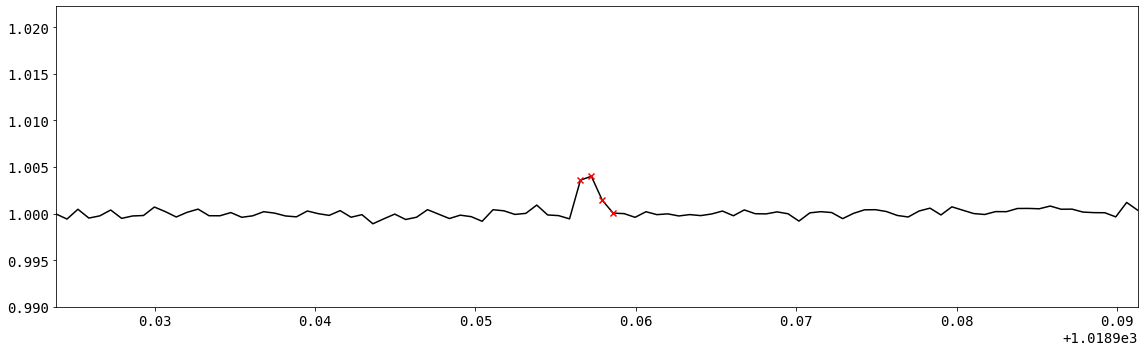

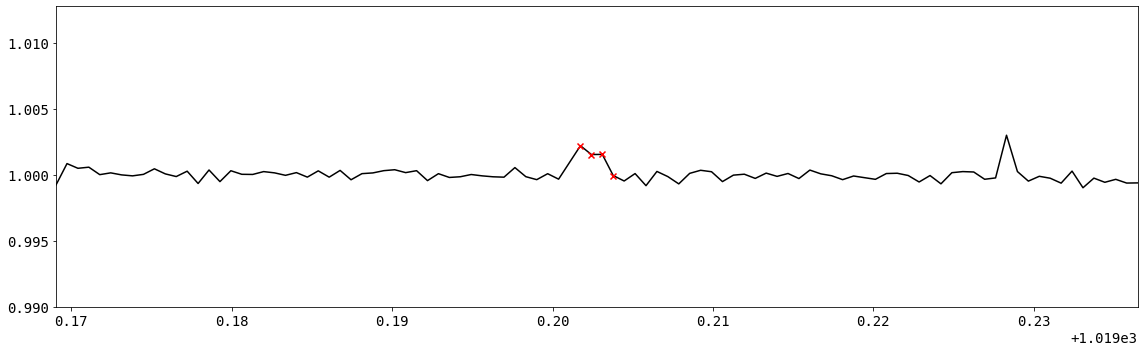

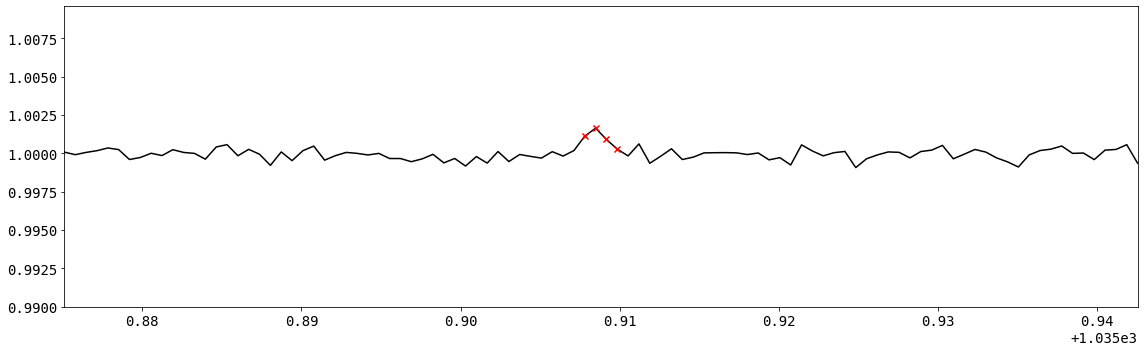

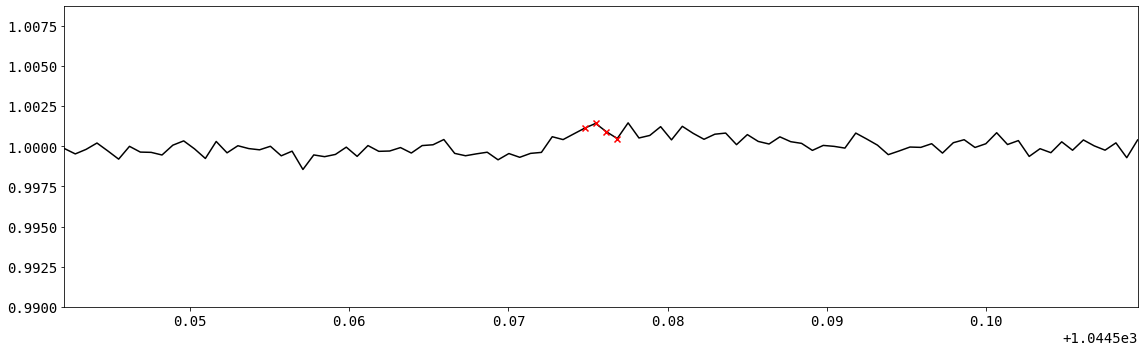

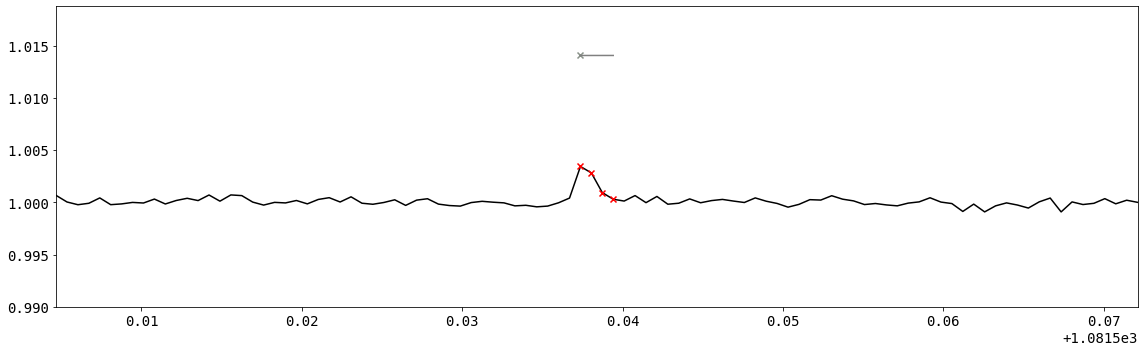

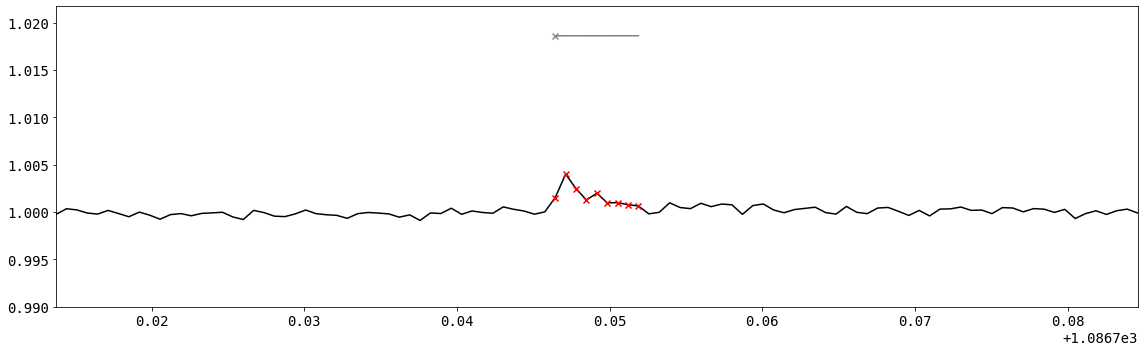

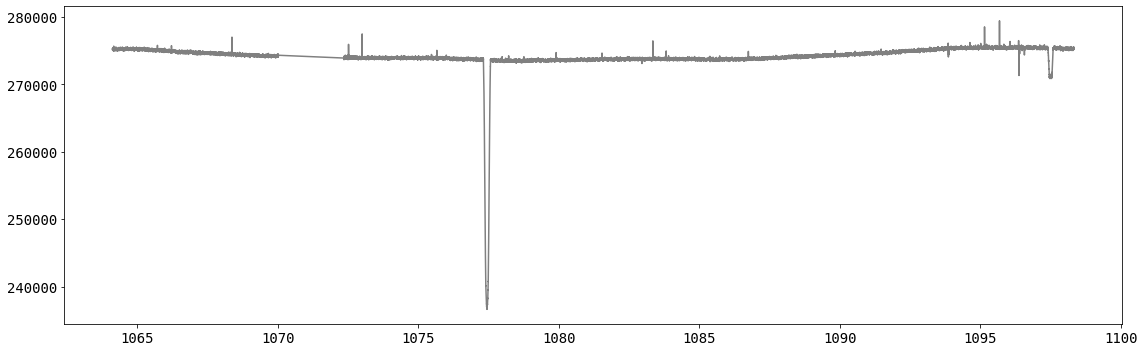

In [949]:
# --------------------------------------
# select flares to vet
f = pd.read_csv("../results/2022_07_flares_vetted.csv")
# ff = ff[(ff.ID == string.split("_")[0]) & (ff.qcs==int(string.split("_")[1]))]
columns = ["TIC","ID","qcs","mission","tstamp"]
name = list(f[f.real.isnull()].groupby(columns).indices)[0]
ff = f[f.real.isnull()].groupby(columns).get_group(name)
TIC, ID, qcs, mission,tstamp = name
shape = f.shape[0]
print(f"Left to vet: {f[f.real.isnull()].shape[0]}")
print(name)
print(ff[['tstart',"tstop","ID","TIC","qcs","real"]])


# ---------------------------------------
# view flares
%matplotlib inline
for j, flare in ff.iloc[:].iterrows():
    ts, tf = flare.tstart, flare.tstop
    t0, t1, i = 1e5, 0., 0
    
    while (ts<t0) | (ts>t1):
        try:
            string = f"{ID}_{qcs:02}_altai_{i}"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        except FileNotFoundError:
            string = f"{TIC}_{qcs:02}_altai_0"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        t0,t1 = fff["time"][0],fff["time"][-1]
#         print(t0,ts,t1)
        i+=1
    plt.figure(figsize=(16,5))
    cap=3
    
#     print(ts,tf)
    _ = fff[np.where((fff['time']>=ts-.1/cap) & (fff['time']<=tf+.1/cap))]
    med = np.median(_['flux'])
    plt.plot(_['time'], _['flux']/med, c="k")
    plt.xlim(_["time"][0],_["time"][-1])
    _ = fff[np.where((fff['time']>=ts-1e-8) & (fff['time']<=tf+1e-8))]
    plt.scatter(_['time'], _['flux']/med, c="r",zorder=10)

    plt.scatter(ts, flare.phase/5 + 1)
    plt.plot(_['time'], _['phase']/5 + 1, c="grey")
    plt.ylim(.99,flare.ampl_rec*5.5 +1)
    
plt.figure(figsize=(16,5))
plt.plot(fff["time"],fff["flux"],c="grey")

In [945]:
f.loc[ff.index,columns+["real"]]

,TIC,ID,qcs,mission,tstamp,real
7537,299096355,Kepler-16,10,Kepler,2022_08_01,NaN


In [946]:
f.loc[ff.index,"real"] = 0

In [947]:
assert f.shape[0] == shape
f.to_csv("../results/2022_07_flares_vetted.csv",index=False)